# Part 2 – Simple Text Processing and Vectorization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from tqdm import tqdm
from collections import Counter

In [2]:
sou = pd.read_csv("data/SOTU.csv")
sou

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
...,...,...,...,...
241,George Washington,1791.0,\nFellow-Citizens of the Senate and House of R...,2264
242,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
243,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
244,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069


<h3>Processing Speeches with SpaCy<h3>

In [3]:
nlp = spacy.load("en_core_web_sm")

# subset the speech dataframe for speeches from 2000 and onwards
df = sou[sou["Year"] >= 2000].copy()
df

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
5,Donald J. Trump,2019.0,"\nThe President. Madam Speaker, Mr. Vice Presi...",5519
6,Donald J. Trump,2018.0,"\nThe President. Mr. Speaker, Mr. Vice Preside...",5755
7,Donald J. Trump,2017.0,"\nThank you very much. Mr. Speaker, Mr. Vice P...",4903
8,Barack Obama,2016.0,"\nThank you. Mr. Speaker, Mr. Vice President, ...",5956
9,Barack Obama,2015.0,"\nThe President. Mr. Speaker, Mr. Vice Preside...",6659


In [4]:
docs = []

for text in df["Text"]:
    doc = nlp(text)
    docs.append(doc)

<h3>Analyze Tokens vs Lemmas<h3>

<h4>Token list<h4>

In [5]:
# Create a list of tokens across all speeches that are not spaces, stopwords, or punctuation.
tokens = [
    token.text.lower()
    for doc in docs
    for token in doc
    if not (token.is_space or token.is_stop or token.is_punct)
]

In [6]:
# print top 20 tokens
counts = Counter(tokens)
counts.most_common(20)

[('america', 816),
 ('people', 637),
 ('american', 582),
 ('new', 530),
 ('years', 439),
 ('americans', 437),
 ('world', 425),
 ('year', 406),
 ('country', 369),
 ('jobs', 348),
 ('tonight', 344),
 ('work', 324),
 ('know', 323),
 ('let', 320),
 ('congress', 317),
 ('nation', 311),
 ('time', 301),
 ('help', 282),
 ('need', 266),
 ('tax', 255)]

<h4>lemma list<h4>

In [7]:
lemmas = [
    token.lemma_.lower()
    for doc in docs
    for token in doc
    if not (token.is_space or token.is_stop or token.is_punct)
]

lemma_counts = Counter(lemmas)
lemma_counts.most_common(20)

[('year', 845),
 ('america', 816),
 ('people', 639),
 ('american', 587),
 ('work', 557),
 ('new', 532),
 ('job', 486),
 ('country', 435),
 ('americans', 432),
 ('world', 426),
 ('know', 395),
 ('nation', 388),
 ('help', 378),
 ('need', 353),
 ('time', 351),
 ('tonight', 344),
 ('child', 332),
 ('let', 326),
 ('congress', 317),
 ('come', 301)]

<h4> Token versus Lemma Comparison <h4>

What do you notice about the top tokens versus the top lemmas? 
Consider two tokens - "year" and "years" - how do their counts compare to the lemma "year"?
What about the lemma "child"?

The overall difference between the top tokens and lemmas is that the Lemma List provides a more concise and accurate measure of the speeches, while the Token List scatters the counts across different forms of the word.

Tokens (raw words) have their counts divided by different versions of the word, such as “job” and “jobs.” This separation causes the frequency of any single form of that word to accumulate less total count. Lemmas represent all the variant forms of the word, and are mapped into a single base word (the lemma). This combines the counts, leading to higher totals and better indications of the more important concepts in the corpus. For example, lemma "year" has 845 counts while token "years" has only 439 counts

The lemma ‘child’ has a frequency count of 332. Since the lemma ‘child’ is the base form, the count represents the times the concept of ‘child’ appears in the text, which can include both the singular token ‘child’ and the frequent plural token ‘children.’ The high count represents the significance of the mentioned topics related to children, family, and education in modern State of the Union addresses.

<h3>Common Words<h3>

<h4>Common Words per Year Function<h4>

In [8]:
def get_most_common_words(df, year, n=25):
    """
    Processes the SOTU speeches for a given year and returns
    the most common non-stopword/punctuation lemmas.
    """

    # Step 1: Subset df for the year of interest
    year_int = int(year)
    sub = df[df["Year"].astype(int) == year_int]

    if sub.empty:
        return []

    # Step 2: Process the text with nlp
    docs = [nlp(text) for text in sub["Text"]]

    # Step 3: Get lemmas
    lemmas = [
        token.lemma_.lower()
        for doc in docs
        for token in doc
        if not (token.is_space or token.is_stop or token.is_punct)
    ]

    # Step 4: Count top n lemmas
    counts = Counter(lemmas).most_common(n)
    return counts

In [9]:
# test it on 2024 (top 10 instead of top 25 to match the example in the given notebook)
get_most_common_words(sou, 2024, n=10)

[('president', 58),
 ('year', 45),
 ('america', 44),
 ('american', 34),
 ('people', 33),
 ('$', 33),
 ('member', 32),
 ('want', 29),
 ('audience', 29),
 ('know', 29)]

<h4>Compare 2023 to 2017<h4>

In [10]:
# get the top 20 words for 2017 and 2023
words_2023 = get_most_common_words(sou, 2023, n=20)
words_2017 = get_most_common_words(sou, 2017, n=20)

In [11]:
words_2023

[('year', 58),
 ('go', 56),
 ('let', 45),
 ('know', 40),
 ('people', 39),
 ('job', 38),
 ('america', 36),
 ('come', 33),
 ('law', 33),
 ('pay', 33),
 ('american', 31),
 ('$', 31),
 ('president', 30),
 ('look', 27),
 ('world', 25),
 ('folk', 24),
 ('nation', 24),
 ('audience', 23),
 ('work', 23),
 ('right', 23)]

In [12]:
words_2017

[('american', 34),
 ('america', 29),
 ('country', 26),
 ('nation', 21),
 ('great', 20),
 ('new', 19),
 ('year', 19),
 ('world', 18),
 ('job', 15),
 ('people', 15),
 ('americans', 14),
 ('united', 13),
 ('tonight', 13),
 ('states', 12),
 ('work', 12),
 ('child', 12),
 ('want', 12),
 ('time', 12),
 ('citizen', 11),
 ('right', 11)]

In [13]:
# turn into a pandas dataframe
df_2023 = pd.DataFrame(words_2023, columns=["word", "count"])
df_2017 = pd.DataFrame(words_2017, columns=["word", "count"])

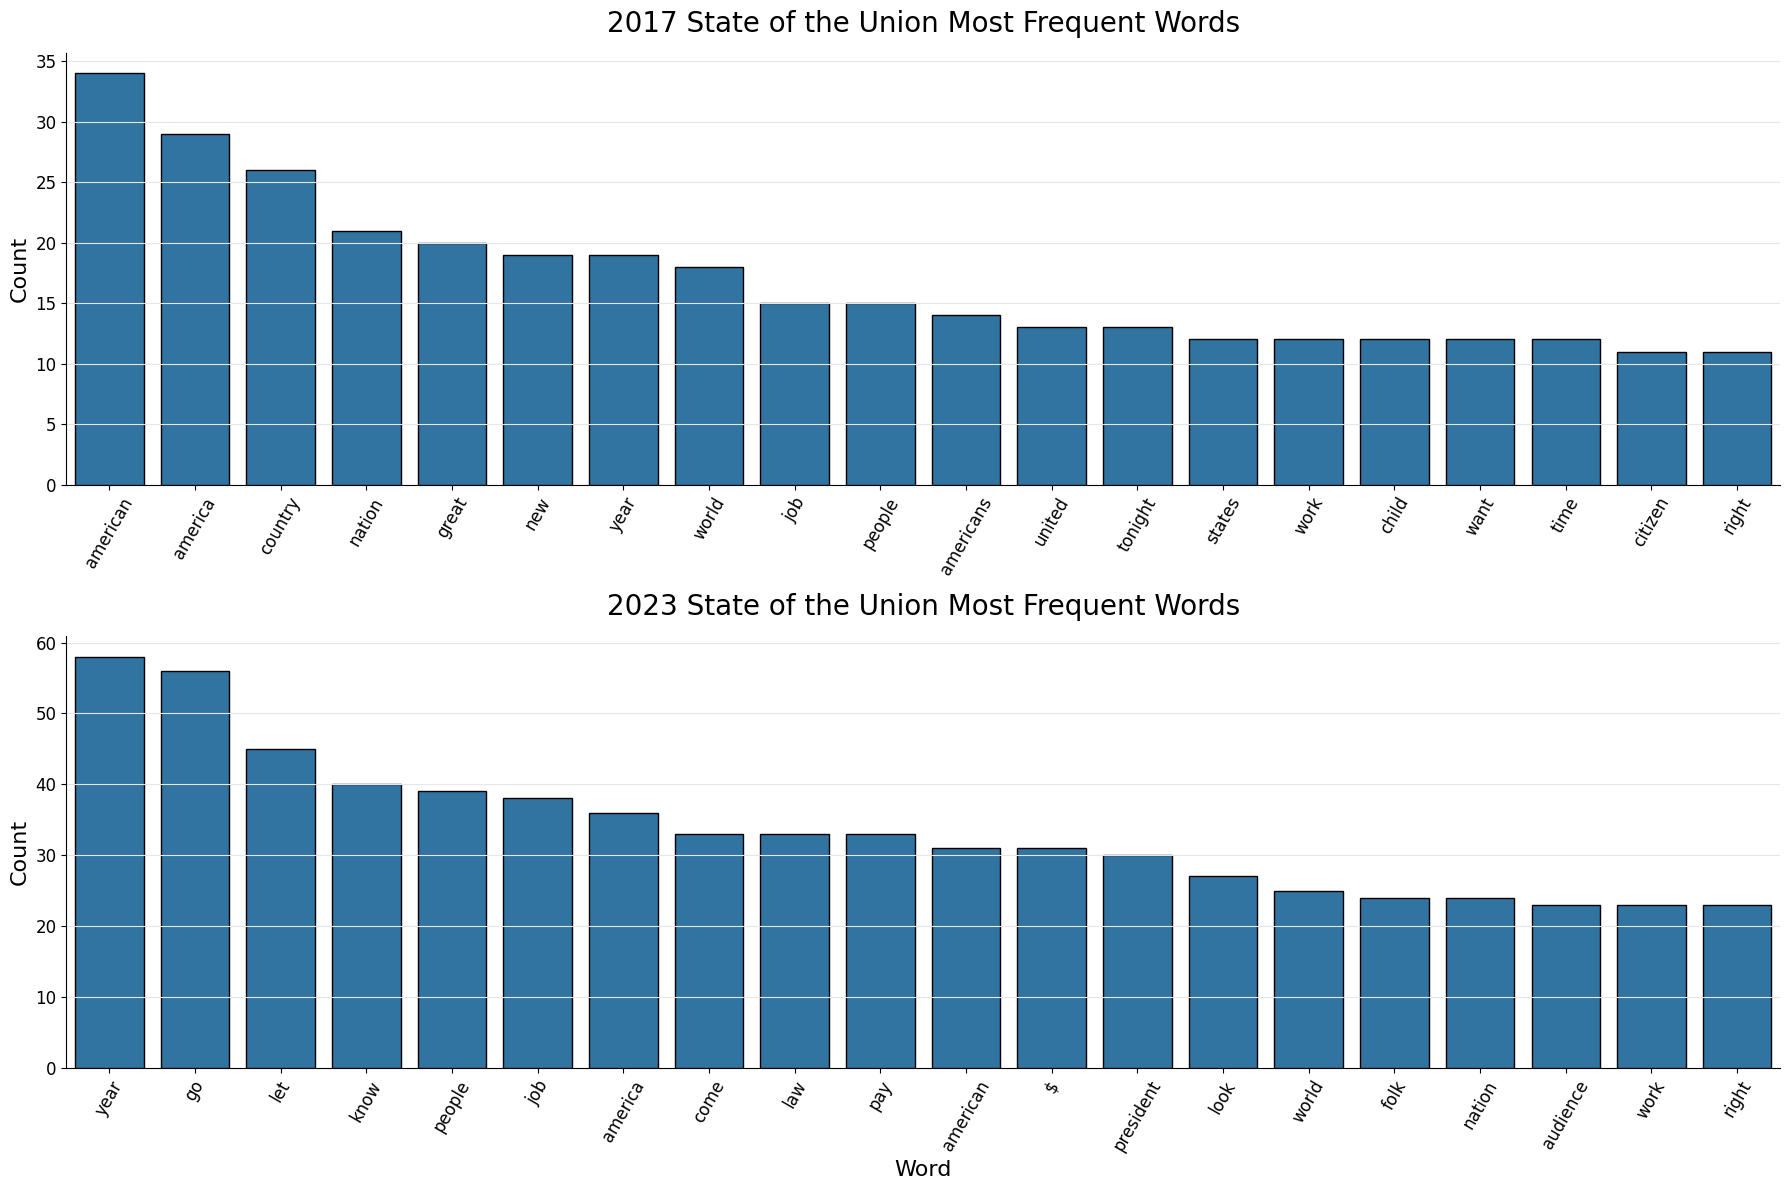

In [14]:
# generate barchart
# sns.set_theme(style="whitegrid", context="talk")

fig, axes = plt.subplots(2, 1, figsize=(18, 12))

sns.barplot(
    data=df_2017,
    x="word",
    y="count",
    ax=axes[0],
    edgecolor="black"
)

axes[0].set_title("2017 State of the Union Most Frequent Words",
                  fontsize=20, pad=15)
axes[0].set_xlabel("")
axes[0].set_ylabel("Count", fontsize=16)
axes[0].tick_params(axis="x", rotation=60, labelsize=12)
axes[0].tick_params(axis="y", labelsize=12)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].grid(axis="y", color="0.9")

sns.barplot(
    data=df_2023,
    x="word",
    y="count",
    ax=axes[1],
    edgecolor="black"
)

axes[1].set_title("2023 State of the Union Most Frequent Words",
                  fontsize=20, pad=15)
axes[1].set_xlabel("Word", fontsize=16)
axes[1].set_ylabel("Count", fontsize=16)
axes[1].tick_params(axis="x", rotation=60, labelsize=12)
axes[1].tick_params(axis="y", labelsize=12)
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
axes[1].grid(axis="y", color="0.9")

plt.tight_layout()

# save plot
plt.savefig("outputs/top_words_2017_2023.png", dpi=300, bbox_inches="tight")

plt.show()

<h3>TF-IDF Vectorization<h3>

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

<h4>Train the Vectorizer and Transform the Data<h4>

In [16]:
raw_docs = sou["Text"].to_list()

tfidf_model = TfidfVectorizer()
tfidf_vectors = tfidf_model.fit_transform(raw_docs).toarray()


<h4>Plot Speeches<h4>

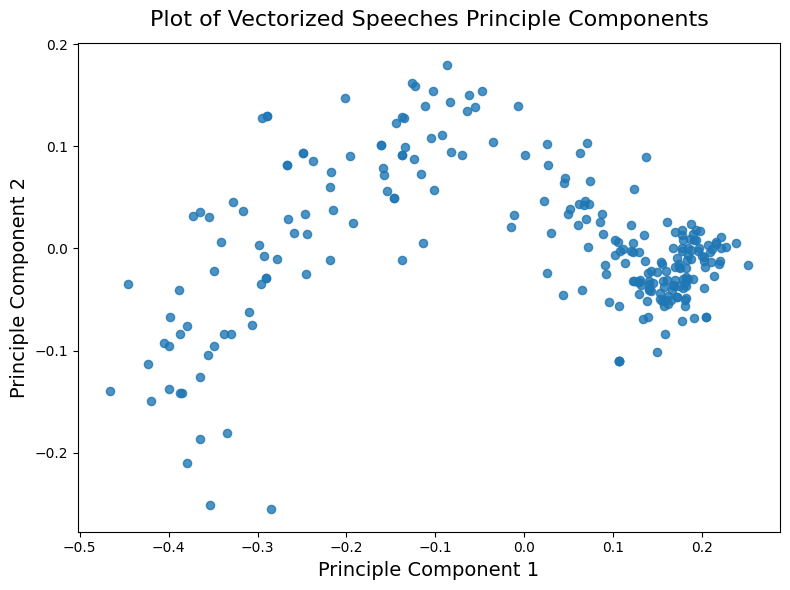

In [17]:
# Set PCA to find first 2 principal components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_vectors)

# Create a new dataframe
df2d = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
df2d["Year"] = sou["Year"].astype(int)
df2d["President"] = sou["President"]

# Plot Data Visualization
plt.figure(figsize=(8, 6))
plt.scatter(
    df2d["PC1"],
    df2d["PC2"],
    s=35,
    alpha=0.8,
    color="tab:blue"
)

plt.title("Plot of Vectorized Speeches Principle Components", fontsize=16, pad=12)
plt.xlabel("Principle Component 1", fontsize=14)
plt.ylabel("Principle Component 2", fontsize=14)

plt.tight_layout()
plt.savefig("outputs/Vectorized_Speeches_PCA.png", dpi=300, bbox_inches="tight")
plt.show()


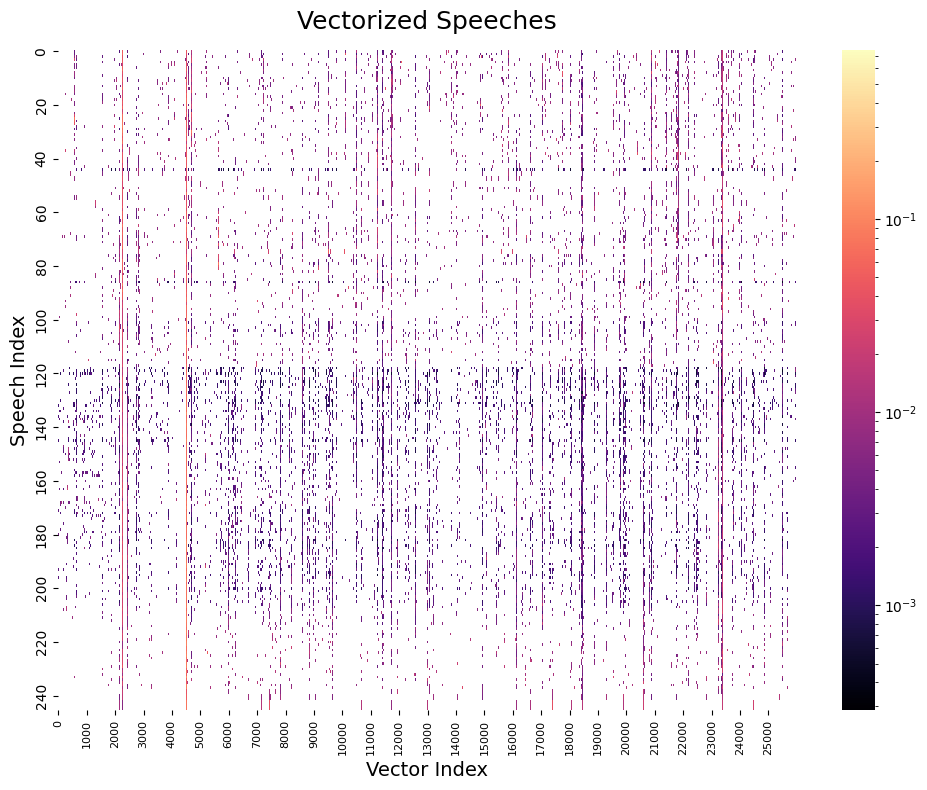

In [18]:
from matplotlib.colors import LogNorm
dense_matrix = tfidf_vectors

plt.figure(figsize=(10,8))

step = 1000   # prints a x-label every 1000 columns
xticks = np.arange(0, dense_matrix.shape[1], step)

ax = sns.heatmap(
    dense_matrix,
    norm=LogNorm(),
    cmap="magma",
    cbar=True,
    xticklabels=False,    
    yticklabels=20
)

# Manually add sparse x-axis labels 
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=90, fontsize=8)

plt.title("Vectorized Speeches", fontsize=18, pad=15)
plt.xlabel("Vector Index", fontsize=14)
plt.ylabel("Speech Index", fontsize=14)

plt.tight_layout()
plt.savefig("outputs/Vectorized_Speeches_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

<h4>Get the TF-IDF value for certain words and documents<h4>

In [19]:
word_list = ['year',
 'america',
 'people',
 'american',
 'work',
 'new',
 'job',
 'country',
 'americans',
 'world'] # top ten most common words through whole corpus

In [20]:
word_nums = [tfidf_model.vocabulary_.get(word) for word in word_list]
idf_score = [tfidf_model.idf_[i] for i in word_nums]
tf_idf = [tfidf_vectors[0][i] for i in word_nums]

In [21]:
pd.DataFrame({"Word": word_list, "IDF Score": idf_score, "TF-IDF Score": tf_idf})

,Word,IDF Score,TF-IDF Score
0,year,1.032925,0.022719
1,america,1.272946,0.068439
2,people,1.037118,0.043087
3,american,1.102217,0.045792
4,work,1.162281,0.005681
5,new,1.024591,0.016275
6,job,2.043480,0.009988
7,country,1.008130,0.013550
8,americans,1.713598,0.041877
9,world,1.138750,0.026438
